In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [550]:
from solvers import util


#### We start by analyzing the comparison of computation times between DP-ILQR, regular consensus ADMM, and potential ADMM:

In [594]:
drones_3_8_combined= pd.read_excel('ADMM_mpc_3_to_8_agents.xlsm', sheet_name='Sheet1')

In [595]:
drones_3_8_combined.columns

Index(['i_trial', ' n_agents', ' t', ' converged', ' obj_trj', 'T', 'dt',
       'radius', '         SOVA_admm ', 't_solve_avg', ' t_solve_std',
       ' MAX_ITER', ' dist_to_goal'],
      dtype='object')

In [596]:
drones_3_8_combined.columns = ['i_trial','n_agents','t','converged','obj_trj','T','dt','radius','SOVA_admm','t_solve_avg','t_solve_std','MAX_ITER','dist_to_goal']

In [597]:
drones_3_8_combined = drones_3_8_combined.loc[drones_3_8_combined['converged']==True]

In [598]:
drones_3_8_combined = drones_3_8_combined.replace(to_replace='None', value=np.nan).dropna()

In [599]:
drones_3_8_combined = drones_3_8_combined.dropna()

In [600]:
drones_3_8_combined.columns

Index(['i_trial', 'n_agents', 't', 'converged', 'obj_trj', 'T', 'dt', 'radius',
       'SOVA_admm', 't_solve_avg', 't_solve_std', 'MAX_ITER', 'dist_to_goal'],
      dtype='object')

In [694]:
drones_3_8_combined['normalized_t_solve'] = drones_3_8_combined['t_solve_avg']/drones_3_8_combined['obj_trj']

In [695]:
drones_3_8_combined['normalized_t_std'] = drones_3_8_combined['t_solve_std']/drones_3_8_combined['obj_trj']

In [696]:
dpilqr_3_to_8_agents = pd.read_excel('dpilqr_3_to_8.xlsm', sheet_name='Sheet1')

In [697]:
dpilqr_3_to_8_agents.columns

Index(['dynamics', 'n_agents', 'i_trial', 'centralized', 'last', 't', 'J',
       'horizon', 'dt', 'converged', 'ids', 't_solve_avg', 't_solve_std',
       'subgraphs', 'dist_left'],
      dtype='object')

In [698]:
dpilqr_3_to_8_agents.drop(columns=['dynamics','last','ids','subgraphs'],inplace=True)

In [699]:
dpilqr_3_to_8_agents.columns = ['n_agents', 'i_trial', 'SOVA_admm', 't','obj_trj', 'T', 'dt', 'converged','t_solve_avg', 't_solve_std', 'dist_to_goal']

In [700]:
dpilqr_3_to_8_agents['normalized_t_solve'] = dpilqr_3_to_8_agents['t_solve_avg']/dpilqr_3_to_8_agents['obj_trj']


In [701]:
dpilqr_3_to_8_agents['normalized_t_std'] = dpilqr_3_to_8_agents['t_solve_std']/dpilqr_3_to_8_agents['obj_trj']

In [702]:
dpilqr_3_to_8_agents.head()

,n_agents,i_trial,SOVA_admm,t,obj_trj,T,dt,converged,t_solve_avg,t_solve_std,dist_to_goal,normalized_t_solve,normalized_t_std
0,3,0,False,1.3,828.167463,8,0.1,True,0.018375,0.003508,"[0.06809967102056529, 0.08392775736397566, 0.0...",0.000022,4.235851e-06
1,3,1,False,1.4,1247.440727,8,0.1,True,0.019545,0.001119,"[0.08209382373905584, 0.027239258113921368, 0....",0.000016,8.973174e-07
2,3,2,False,1.7,1800.550330,8,0.1,True,0.080149,0.007683,"[0.09771915630264676, 0.07990022619853404, 0.0...",0.000045,4.267041e-06
3,3,3,False,1.2,875.209328,8,0.1,True,0.037942,0.003617,"[0.027404585265289782, 0.057506596816226156, 0...",0.000043,4.133216e-06
4,3,4,False,1.1,802.755533,8,0.1,True,0.031827,0.004204,"[0.023639860153240266, 0.05510405304572813, 0....",0.000040,5.236896e-06


In [703]:
dpilqr_3_to_8_agents['SOVA_admm']='ilqr'

In [704]:
dpilqr_admm_df = pd.concat((dpilqr_3_to_8_agents,drones_3_8_combined),ignore_index=True)

In [705]:
dpilqr_admm_df.columns

Index(['n_agents', 'i_trial', 'SOVA_admm', 't', 'obj_trj', 'T', 'dt',
       'converged', 't_solve_avg', 't_solve_std', 'dist_to_goal',
       'normalized_t_solve', 'normalized_t_std', 'radius', 'MAX_ITER'],
      dtype='object')

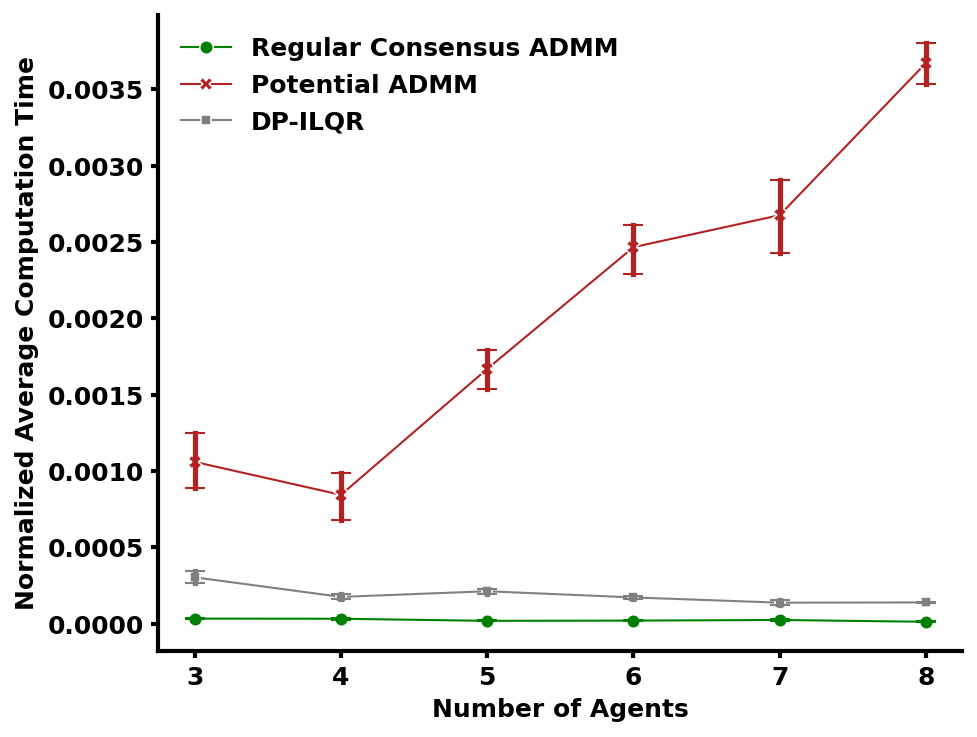

In [706]:
plt.figure(dpi=150)
err_kws = {'capsize': 5, 'capthick':1, 'elinewidth':2.5}
ax = sns.lineplot(data=dpilqr_admm_df, x="n_agents", y="normalized_t_solve", hue='SOVA_admm', lw=1.0, style='SOVA_admm',
             dashes=False, markers=True, markersize=6.5 ,palette=["green", "firebrick", "grey"], err_style='bars', err_kws = err_kws)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.0)

    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(width=2.0)

plt.xticks(size=12, weight= 'bold')
plt.yticks(size=12, weight= 'bold')
# ax.set_xlabel(ax.get_xlabel(), fontsize=12, weight='bold')
# ax.set_ylabel(ax.get_ylabel(), fontsize=12, weight='bold')
plt.ylabel('Normalized Average Computation Time' , fontsize=12, weight='bold');
plt.xlabel('Number of Agents', fontsize=12, weight='bold');
plt.legend(labels=['Regular Consensus ADMM','Potential ADMM','DP-ILQR'],frameon=False,prop={'weight':'bold','size':12})

plt.savefig('results/avg_computation_times_comparison.png', bbox_inches = 'tight', dpi=250, facecolor = ax.get_facecolor())


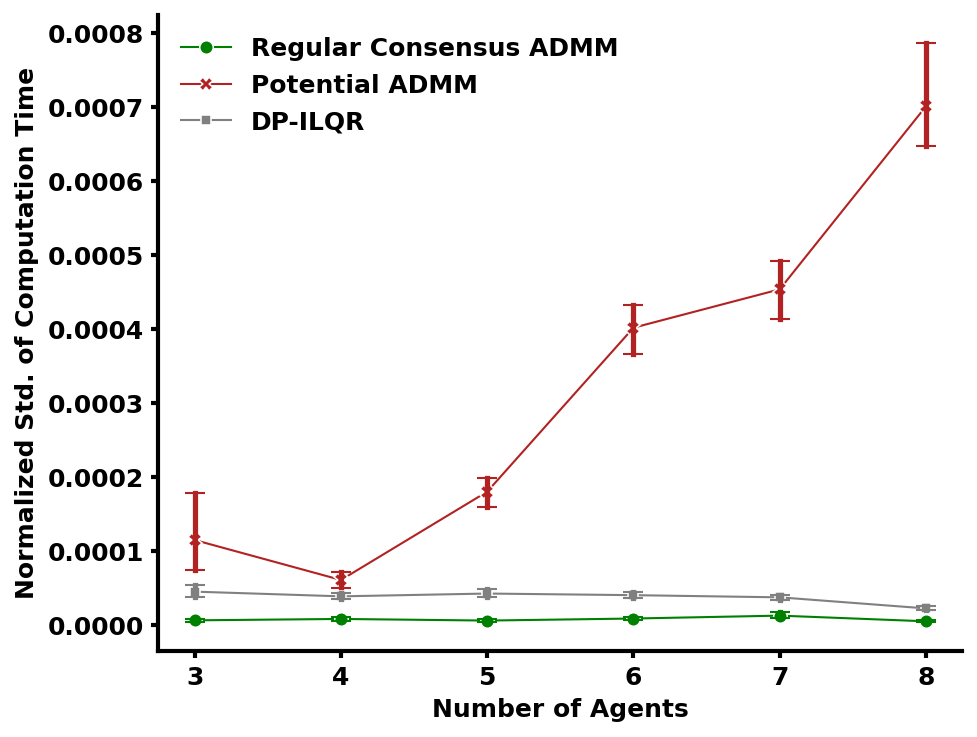

In [945]:
plt.figure(dpi=150)
err_kws = {'capsize': 5, 'capthick':1, 'elinewidth':2.5}
ax = sns.lineplot(data=dpilqr_admm_df, x="n_agents", y="normalized_t_std", hue='SOVA_admm', lw=1.0, style='SOVA_admm',
             dashes=False, markers=True, markersize=6.5,palette=["green", "firebrick", "grey"], err_style='bars', err_kws = err_kws)


for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.0)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(width=2.0)

plt.xticks(size=12, weight= 'bold')
plt.yticks(size=12, weight= 'bold')
# ax.set_xlabel(ax.get_xlabel(), fontsize=12, weight='bold')
# ax.set_ylabel(ax.get_ylabel(), fontsize=12, weight='bold')
plt.ylabel('Normalized Std. of Computation Time',fontsize=12, weight='bold');
plt.xlabel('Number of Agents',fontsize=12, weight='bold');
plt.legend(labels=['Regular Consensus ADMM','Potential ADMM','DP-ILQR'],frameon=False,prop={'weight':'bold','size':12})

plt.savefig('results/std_computation_times_comparison.png', bbox_inches = 'tight', dpi=250, facecolor = ax.get_facecolor())


#### Now we analyze optimality gaps between DP-ILQR and potential ADMM compared against a vanilla centralized MPC baseline


In [924]:
optimality_df = pd.read_excel('ADMM_mpc_max_Iters_1_to_10.xlsm', sheet_name='Sheet1')

In [925]:
optimality_df.columns

Index(['i_trial', ' n_agents', ' t', ' converged', ' obj_trj', 'T', 'dt',
       'radius', '         SOVA_admm ', 't_solve_avg', ' t_solve_std',
       ' MAX_ITER', ' dist_to_goal'],
      dtype='object')

In [926]:
optimality_df.columns = ['i_trial', 'n_agents', 't', 'converged', 'obj_trj', 'T', 'dt',
       'radius', 'SOVA_admm', 't_solve_avg', 't_solve_std',
       'MAX_ITER', 'dist_to_goal']

In [927]:
optimality_df = optimality_df[optimality_df['converged']==True]

In [929]:
optimality_df = optimality_df.replace(to_replace=np.inf, value=np.nan).dropna()

In [930]:
# optimality_df.loc[optimality_df['MAX_ITER']==' None']

In [931]:
optimality_df = optimality_df[optimality_df['MAX_ITER'].isin([3, ' None'])]

In [932]:
optimality_df = optimality_df.drop(columns=['MAX_ITER','radius'])

In [933]:
optimality_df['normalized_t_solve'] = optimality_df['t_solve_avg']/optimality_df['obj_trj']


In [934]:
optimality_df['normalized_t_std'] = optimality_df['t_solve_std']/optimality_df['obj_trj']

In [935]:
optimality_df.columns

Index(['i_trial', 'n_agents', 't', 'converged', 'obj_trj', 'T', 'dt',
       'SOVA_admm', 't_solve_avg', 't_solve_std', 'dist_to_goal',
       'normalized_t_solve', 'normalized_t_std'],
      dtype='object')

In [936]:
dpilqr_3_to_8_agents.columns

Index(['n_agents', 'i_trial', 'SOVA_admm', 't', 'obj_trj', 'T', 'dt',
       'converged', 't_solve_avg', 't_solve_std', 'dist_to_goal',
       'normalized_t_solve', 'normalized_t_std'],
      dtype='object')

In [937]:
final_df = pd.concat((optimality_df,dpilqr_3_to_8_agents),ignore_index=True)

In [938]:
final_df.head()

,i_trial,n_agents,t,converged,obj_trj,T,dt,SOVA_admm,t_solve_avg,t_solve_std,dist_to_goal,normalized_t_solve,normalized_t_std
0,0,3,1.2,True,543.811964,8,0.1,centralized_mpc,0.334100,0.018095,[0.079 0.078 0.021],0.000614,0.000033
1,0,3,1.2,True,607.180803,8,0.1,True,0.486333,0.065603,[0.08 0.069 0.022],0.000801,0.000108
2,0,3,1.4,True,836.399225,8,0.1,centralized_mpc,0.342919,0.021259,[0.056 0.067 0.095],0.000410,0.000025
3,0,3,1.4,True,1043.743207,8,0.1,centralized_mpc,0.348794,0.029577,[0.089 0.093 0.098],0.000334,0.000028
4,1,3,1.4,True,907.196652,8,0.1,centralized_mpc,0.349751,0.037983,[0.1 0.081 0.083],0.000386,0.000042


In [939]:
final_df['SOVA_admm'].unique()

array(['centralized_mpc', True, 'ilqr'], dtype=object)

In [940]:
final_df['relative_gap'] \
    = np.abs(final_df.loc[final_df['SOVA_admm']==True]['obj_trj']-final_df.loc[final_df['SOVA_admm']=='centralized_mpc']['obj_trj'])/final_df.loc[final_df['SOVA_admm']=='centralized_mpc']['obj_trj']

#### This comparison is against a centralized MPC without consensus

In [395]:
# #This comparison is against a centralized MPC without consensus, not very fair!!!
# plt.figure(dpi=150)
# err_kws = {'capsize': 5, 'capthick':1, 'elinewidth':2.5}
# sns.lineplot(data=decentralized_admm, x="n_agents", y="obj_trj", hue='MAX_ITER', lw=1.0, style='MAX_ITER',dashes=False,
#               markers=True, markersize=8, palette=["green", "firebrick","black"],err_style='bars', err_kws = err_kws)
# sns.lineplot(data=centralized_admm, x="n_agents", y="obj_trj", lw=1.0, style='MAX_ITER',dashes=False,
#               markers=True, markersize=8, palette=["grey"],err_style='bars', err_kws = err_kws)
# plt.ylabel('Relative Optimality Gap %');
# plt.xlabel('Number of Agents');

# for axis in ['bottom','left']:
#     ax.spines[axis].set_linewidth(2.0)
    
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.tick_params(width=2.0)

# plt.xticks(size=12, weight= 'bold')
# plt.yticks(size=12, weight= 'bold')
# ax.set_xlabel(ax.get_xlabel(), fontsize=12, weight='bold')
# ax.set_ylabel(ax.get_ylabel(), fontsize=12, weight='bold')

# plt.legend(labels=['Potential ADMM with 1 iteration',
#                    'Potential ADMM with 5 iteration',
#                    'Potential ADMM with 10 iteration',
#                    ],frameon=False,prop={'weight':'bold','size':8},loc = 'best')

# plt.savefig('results/relative_optimality_gap.png', bbox_inches = 'tight', dpi=250, facecolor = ax.get_facecolor())

In [384]:
# success_count=df.groupby(['SOVA_admm','n_agents'])['converged'].value_counts()

In [385]:
# success_count

In [386]:
# success_count_df = pd.DataFrame(success_count)

In [387]:
# success_count_df=success_count_df.rename(columns={'converged':'count'})

In [388]:
# success_count_df = success_count_df.reset_index()

In [389]:
# success_count_df

In [390]:
# centralized = success_count_df.loc[success_count_df['SOVA_admm']==False]

In [391]:
# distributed = success_count_df.loc[success_count_df['SOVA_admm']==True]

In [392]:
# centralized.loc[centralized['converged']==True]['count'].sum()/180 #probability of convergence out of all trials

In [393]:
# distributed.loc[distributed['converged']==True]['count'].sum()/180

In [394]:
# success_count_df

#### An analysis of optimality gap between potential ADMM vs global variable consensus ADMM would be more fair:

### Comparison w/ DP-ilQR:

In [341]:
dpilqr_3_to_8_agents = pd.read_excel('dpilqr_3_8_agents.xlsm', sheet_name='Sheet1')

In [342]:
dpilqr_3_to_8_agents.head()

,n_agents,trial,centralized,J,horizon,dt,converged,times,dist_left
0,3,0,False,632.247133,8,0.1,True,0.020832,"[0.08713813708025549, 0.0602860545647581, 0.03..."
1,3,1,False,1194.222717,8,0.1,True,0.059418,"[0.09974560245842003, 0.03773806272288654, 0.0..."
2,3,2,False,730.520005,8,0.1,True,0.039853,"[0.09920918487331863, 0.0666942255881801, 0.09..."
3,3,3,False,680.692175,8,0.1,True,0.016438,"[0.06604134328275323, 0.02728557933646599, 0.0..."
4,3,4,False,948.543104,8,0.1,True,0.025794,"[0.06962963788774379, 0.08250096513209344, 0.0..."


In [343]:
dpilqr_3_to_8_agents = dpilqr_3_to_8_agents.loc[dpilqr_3_to_8_agents['converged']==True]

In [351]:
dpilqr_results = dpilqr_3_to_8_agents.loc[dpilqr_3_to_8_agents['centralized']==False]

In [352]:
dpilqr_results.head()

,n_agents,trial,centralized,J,horizon,dt,converged,times,dist_left
0,3,0,False,632.247133,8,0.1,True,0.020832,"[0.08713813708025549, 0.0602860545647581, 0.03..."
1,3,1,False,1194.222717,8,0.1,True,0.059418,"[0.09974560245842003, 0.03773806272288654, 0.0..."
2,3,2,False,730.520005,8,0.1,True,0.039853,"[0.09920918487331863, 0.0666942255881801, 0.09..."
3,3,3,False,680.692175,8,0.1,True,0.016438,"[0.06604134328275323, 0.02728557933646599, 0.0..."
4,3,4,False,948.543104,8,0.1,True,0.025794,"[0.06962963788774379, 0.08250096513209344, 0.0..."


In [349]:
# dpilqr_comparison_df = dpilqr_results.groupby(['n_agents']).agg({'J': ['mean', 'std']})

In [353]:
# dpilqr_comparison_df

In [354]:
# dpilqr_comparison_df.columns=['mean_value','std_value']

In [355]:
# dpilqr_comparison_df = dpilqr_comparison_df.reset_index()

In [356]:
# dpilqr_comparison_df['SOVA_admm']=False

In [357]:
# admm_dpilqr_comparison =pd.concat((decentralized_admm,dpilqr_comparison_df))

In [358]:
# decentralized_admm_comparison.columns

In [363]:
# dpilqr_comparison_df

In [361]:
# admm_dpilqr_comparison = admm_dpilqr_comparison.loc[admm_dpilqr_comparison['SOVA_admm']==True]

In [364]:
dpilqr_results.head()

,n_agents,trial,centralized,J,horizon,dt,converged,times,dist_left
0,3,0,False,632.247133,8,0.1,True,0.020832,"[0.08713813708025549, 0.0602860545647581, 0.03..."
1,3,1,False,1194.222717,8,0.1,True,0.059418,"[0.09974560245842003, 0.03773806272288654, 0.0..."
2,3,2,False,730.520005,8,0.1,True,0.039853,"[0.09920918487331863, 0.0666942255881801, 0.09..."
3,3,3,False,680.692175,8,0.1,True,0.016438,"[0.06604134328275323, 0.02728557933646599, 0.0..."
4,3,4,False,948.543104,8,0.1,True,0.025794,"[0.06962963788774379, 0.08250096513209344, 0.0..."


In [362]:
drones_3_8_combined.head()

,i_tria,n_agents,t,converged,obj_trj,T,dt,radius,SOVA_admm,t_solve_avg,t_solve_std,MAX_ITER,dist_to_goal,normalized_t_solve,normalized_std
0,0.0,3,1.9,1.0,1131.695506,8.0,0.1,0.5,False,0.882948,0.137242,3.0,[0.091 0.023 0.077],0.000780,0.000121
1,0.0,3,1.6,1.0,2462.952611,8.0,0.1,0.5,True,0.389646,0.051050,3.0,[0.096 0.056 0.095],0.000158,0.000021
4,2.0,3,1.6,1.0,2188.728334,8.0,0.1,0.5,False,0.761009,0.048872,3.0,[0.064 0.034 0.086],0.000348,0.000022
5,2.0,3,1.6,1.0,2133.528468,8.0,0.1,0.5,True,0.336251,0.056193,3.0,[0.066 0.034 0.086],0.000158,0.000026
6,3.0,3,1.2,1.0,454.775939,8.0,0.1,0.5,False,0.749026,0.045300,3.0,[0.091 0.081 0.051],0.001647,0.000100


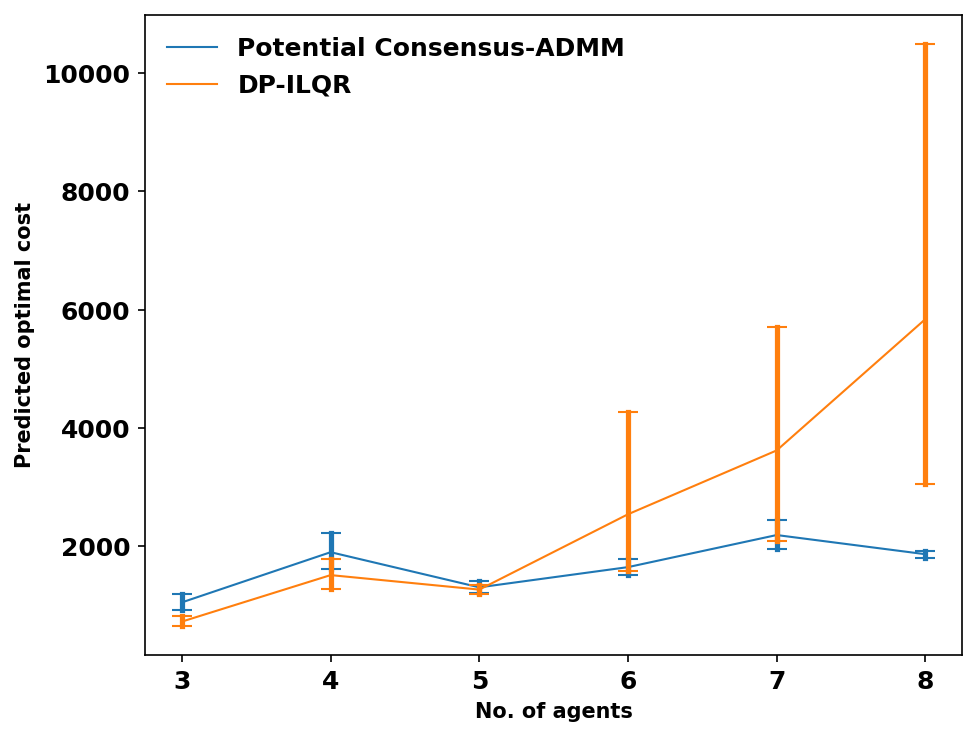

In [412]:
plt.figure(dpi=150)
# sns.lineplot(data=drones_3_8_combined , x='n_agents', y='obj_trj',label='Potential ADMM')
# sns.lineplot(data=dpilqr_results, x='n_agents',y='J' ,label='DP-ILQR')
err_kws = {'capsize': 5, 'capthick':1, 'elinewidth':2.5}
sns.lineplot(data=drones_3_8_combined, x="n_agents", y="obj_trj", lw=1.0, dashes=False,
              markers=['o'], markersize=8, palette=["green"],err_style='bars', err_kws = err_kws,label='Potential ADMM')
sns.lineplot(data=dpilqr_results, x="n_agents", y="J", lw=1.0, dashes=False,
              markers=['^'], markersize=8, palette=["grey"],err_style='bars', err_kws = err_kws,label='DP-ILQR')
# plt.xlabel('No of agents')
# plt.ylabel('Average Trajectory Cost')

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.0)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(width=2.0)

plt.xticks(size=12, weight= 'bold')
plt.yticks(size=12, weight= 'bold')
# ax.set_xlabel('Predicted optimal cost', fontsize=12, weight='bold')
# ax.set_ylabel(ax.get_ylabel(), fontsize=12, weight='bold')
plt.ylabel('Predicted optimal cost',fontsize=10,weight='bold')
plt.xlabel('No. of agents',fontsize=10,weight='bold')
plt.legend(frameon=False,prop={'weight':'bold','size':12},loc = 'best')

plt.savefig('results/ADMM_vs_DPILQR.png')